In [ ]:
#TikTok_ Combine polarity analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Set larger font sizes for all plot elements
plt.rcParams.update({'font.size': 14})

In [3]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_TikTok_comments3.csv')[['Lemmatized_Comments']]

In [4]:
# Load the dataset- a CSV file - with a 'NRC_analysis' column
df1 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\lexicon_emotions_TikTok26.csv')[['NRC_analysis']]

In [5]:
# Load the dataset- a CSV file - with a 'DistilBERT_emotion_labels' column
df2 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\Pre-trained Model Analysis_tiktok26.csv')[['DistilBERT_emotion_labels']]

In [6]:
# Load the dataset- a CSV file - with a 'RoBERTa_emotion' column
df3 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\Roberta_Emotion_Analysis_tiktok26.csv')[['RoBERTa_emotion']]

In [7]:
# Load the dataset- a CSV file - with a 'VADER_emotion' column
df4 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\VADER_Emotion_Analysis_TikTok26.csv')[['VADER_emotion']]

In [8]:
# Load the dataset- a CSV file - with a 'TextBlob_Emotion' column
df5 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\TextBlob_polarity_Emotion_Analysis_TikTok26.csv')[['TextBlob_Emotion']]

In [9]:
# Combine all the DataFrames horizontally
combined_df = pd.concat([df, df1, df2, df3, df4, df5], axis=1)

# Display the combined DataFrame
print(combined_df.head())

# Save the combined DataFrame to a new CSV file
combined_df.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\TikTok\combined_emotion_analysis.csv', index=False)
print("Combined DataFrame saved as 'combined_emotion_analysis.csv'.")

                                 Lemmatized_Comments           NRC_analysis  \
0  jojoba oil instead olive oil jojoba mean clean...  ['Neutral', 'Joyful']   
1                               throw washer after ?            ['Neutral']   
2     magic makeup eraser towel last year need water            ['Content']   
3                                makeup eraser cloth                     []   
4      esthetician try almond oil jojoba oil instead                     []   

        DistilBERT_emotion_labels                         RoBERTa_emotion  \
0                      {'Joyful'}                   ['Joyful', 'Neutral']   
1  {'Joyful', 'Trust', 'Content'}                               ['Anger']   
2             {'Joyful', 'Trust'}                   ['Joyful', 'Neutral']   
3                       {'Anger'}                             ['Neutral']   
4    {'Joyful', 'Disappointment'}  ['Anger', 'Disappointment', 'Neutral']   

  VADER_emotion TextBlob_Emotion  
0       Neutral   Disappoin

In [10]:
# # Select relevant columns from the DataFrame
comparison_df = combined_df[['Lemmatized_Comments', 'NRC_analysis', 'DistilBERT_emotion_labels', 'TextBlob_Emotion', 'VADER_emotion', 'RoBERTa_emotion']]

# Display the combined DataFrame for verification
print(comparison_df.head())


                                 Lemmatized_Comments           NRC_analysis  \
0  jojoba oil instead olive oil jojoba mean clean...  ['Neutral', 'Joyful']   
1                               throw washer after ?            ['Neutral']   
2     magic makeup eraser towel last year need water            ['Content']   
3                                makeup eraser cloth                     []   
4      esthetician try almond oil jojoba oil instead                     []   

        DistilBERT_emotion_labels TextBlob_Emotion VADER_emotion  \
0                      {'Joyful'}   Disappointment       Neutral   
1  {'Joyful', 'Trust', 'Content'}          Neutral       Neutral   
2             {'Joyful', 'Trust'}            Trust         Trust   
3                       {'Anger'}          Neutral       Neutral   
4    {'Joyful', 'Disappointment'}          Neutral       Neutral   

                          RoBERTa_emotion  
0                   ['Joyful', 'Neutral']  
1                           

In [11]:
print(df.columns)


Index(['Lemmatized_Comments'], dtype='object')


In [12]:
print(comparison_df['NRC_analysis'].head())
print(comparison_df['DistilBERT_emotion_labels'].head())
print(comparison_df['RoBERTa_emotion'].head())
print(comparison_df['VADER_emotion'].head())
print(comparison_df['TextBlob_Emotion'].head())


0    ['Neutral', 'Joyful']
1              ['Neutral']
2              ['Content']
3                       []
4                       []
Name: NRC_analysis, dtype: object
0                        {'Joyful'}
1    {'Joyful', 'Trust', 'Content'}
2               {'Joyful', 'Trust'}
3                         {'Anger'}
4      {'Joyful', 'Disappointment'}
Name: DistilBERT_emotion_labels, dtype: object
0                     ['Joyful', 'Neutral']
1                                 ['Anger']
2                     ['Joyful', 'Neutral']
3                               ['Neutral']
4    ['Anger', 'Disappointment', 'Neutral']
Name: RoBERTa_emotion, dtype: object
0    Neutral
1    Neutral
2      Trust
3    Neutral
4    Neutral
Name: VADER_emotion, dtype: object
0    Disappointment
1           Neutral
2             Trust
3           Neutral
4           Neutral
Name: TextBlob_Emotion, dtype: object


In [13]:
from collections import Counter
import pandas as pd

# Debugging Step: Check data types in the columns
print("Data types in NRC_analysis:", comparison_df['NRC_analysis'].apply(type).value_counts())
print("Data types in DistilBERT_emotion_labels:", comparison_df['DistilBERT_emotion_labels'].apply(type).value_counts())
print("Data types in RoBERTa_emotion:", comparison_df['RoBERTa_emotion'].apply(type).value_counts())

# Function to count emotions in list-based columns
def count_emotions_list(column_data):
    all_emotions = []
    for emotions in column_data:
        if isinstance(emotions, list):
            all_emotions.extend(emotions)
        elif isinstance(emotions, str):
            # Handle stringified lists (e.g., "['Joyful', 'Trust']")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, list):
                    all_emotions.extend(eval_emotions)
            except:
                pass  # Skip if it can't be evaluated
    return Counter(all_emotions)

# Function to count emotions in set-based columns
def count_emotions_set(column_data):
    all_emotions = []
    for emotions in column_data:
        if isinstance(emotions, set):
            all_emotions.extend(list(emotions))
        elif isinstance(emotions, str):
            # Handle stringified sets (e.g., "{'Joyful', 'Trust'}")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, set):
                    all_emotions.extend(list(eval_emotions))
            except:
                pass
    return Counter(all_emotions)

# Function to count emotions in dict-based columns
def count_emotions_dict(column_data):
    total_counts = Counter()
    for emotions in column_data:
        if isinstance(emotions, dict):
            total_counts.update(emotions)
        elif isinstance(emotions, str):
            # Handle stringified dictionaries (e.g., "{'Joyful': 1, 'Trust': 2}")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, dict):
                    total_counts.update(eval_emotions)
            except:
                pass
    return total_counts

# Aggregating emotion counts
try:
    
    nrc_emotion_counts = count_emotions_list(comparison_df['NRC_analysis'])
    distilbert_emotion_counts = count_emotions_set(comparison_df['DistilBERT_emotion_labels'])
    roberta_emotion_counts = count_emotions_list(comparison_df['RoBERTa_emotion'])
    vader_emotion_counts = Counter(comparison_df['VADER_emotion'])
    textblob_emotion_counts = Counter(comparison_df['TextBlob_Emotion'])
except Exception as e:
    print("Error during aggregation:", e)

# Combine results into a DataFrame
emotion_counts_df_tiktok = pd.DataFrame({
    
    'NRC': nrc_emotion_counts,
    'DistilBERT': distilbert_emotion_counts,
    'RoBERTa': roberta_emotion_counts,
    'VADER': vader_emotion_counts,
    'TextBlob': textblob_emotion_counts
}).fillna(0).astype(int)

# Display the aggregated emotion counts
print(emotion_counts_df_tiktok)


Data types in NRC_analysis: NRC_analysis
<class 'str'>    2259
Name: count, dtype: int64
Data types in DistilBERT_emotion_labels: DistilBERT_emotion_labels
<class 'str'>    2259
Name: count, dtype: int64
Data types in RoBERTa_emotion: RoBERTa_emotion
<class 'str'>    2259
Name: count, dtype: int64
                 NRC  DistilBERT  RoBERTa  VADER  TextBlob
Neutral          656           0     2126    665      1179
Joyful          1207        1872      761    696       216
Content          112         401        0     48       225
Trust            968         893        0    582       427
Anger            622         261      674     64         0
Disappointment   567         854      930    204       121
Discontent         0           0        0      0        91


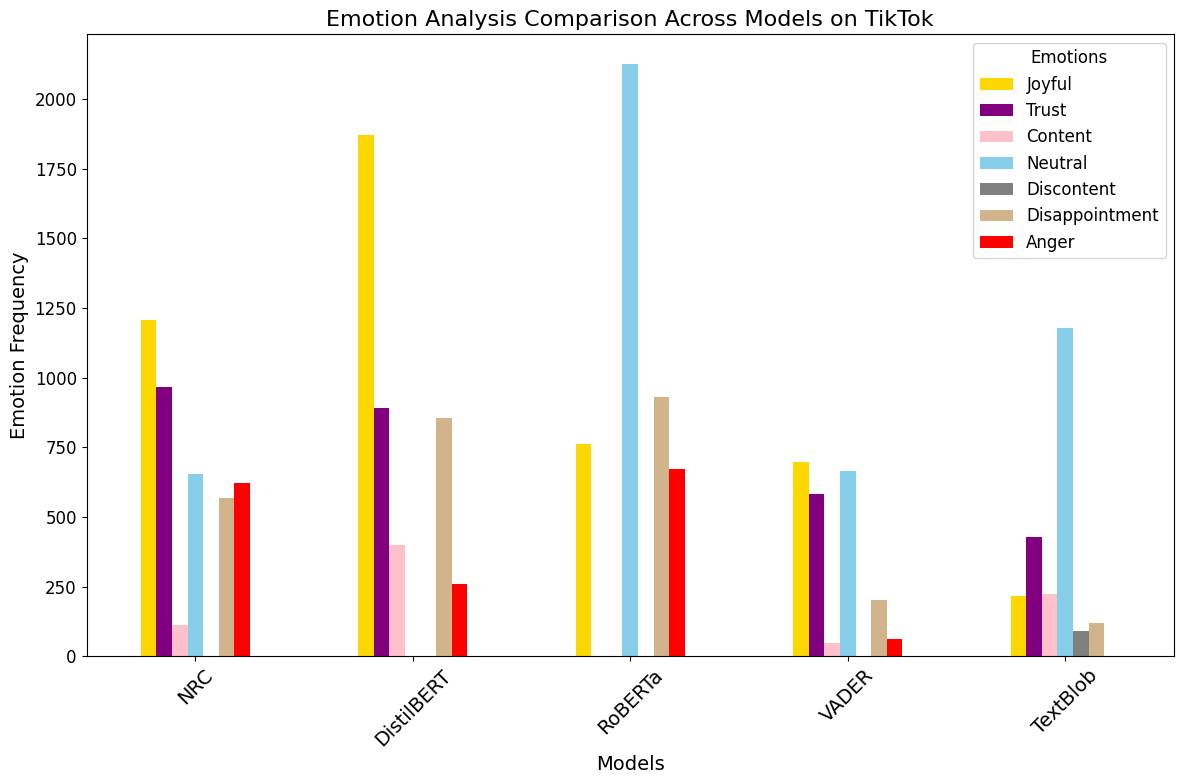

In [14]:
# Define custom colors for emotions
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown (hex code for "tan")
    'Anger': 'red'
}

# Define the desired order of emotions
emotion_order = ['Joyful', 'Trust', 'Content', 'Neutral', 'Discontent', 'Disappointment', 'Anger']

# Ensure the DataFrame follows the desired emotion order
emotion_summary_transposed_tiktok = emotion_counts_df_tiktok.T[emotion_order]

# Plot with custom colors
ax = emotion_summary_transposed_tiktok.plot(
    kind='bar',
    figsize=(12, 8),
    color=[custom_colors[emotion] for emotion in emotion_order]
)

# Customize the chart
plt.title('Emotion Analysis Comparison Across Models on TikTok', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Emotion Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.legend(title='Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()


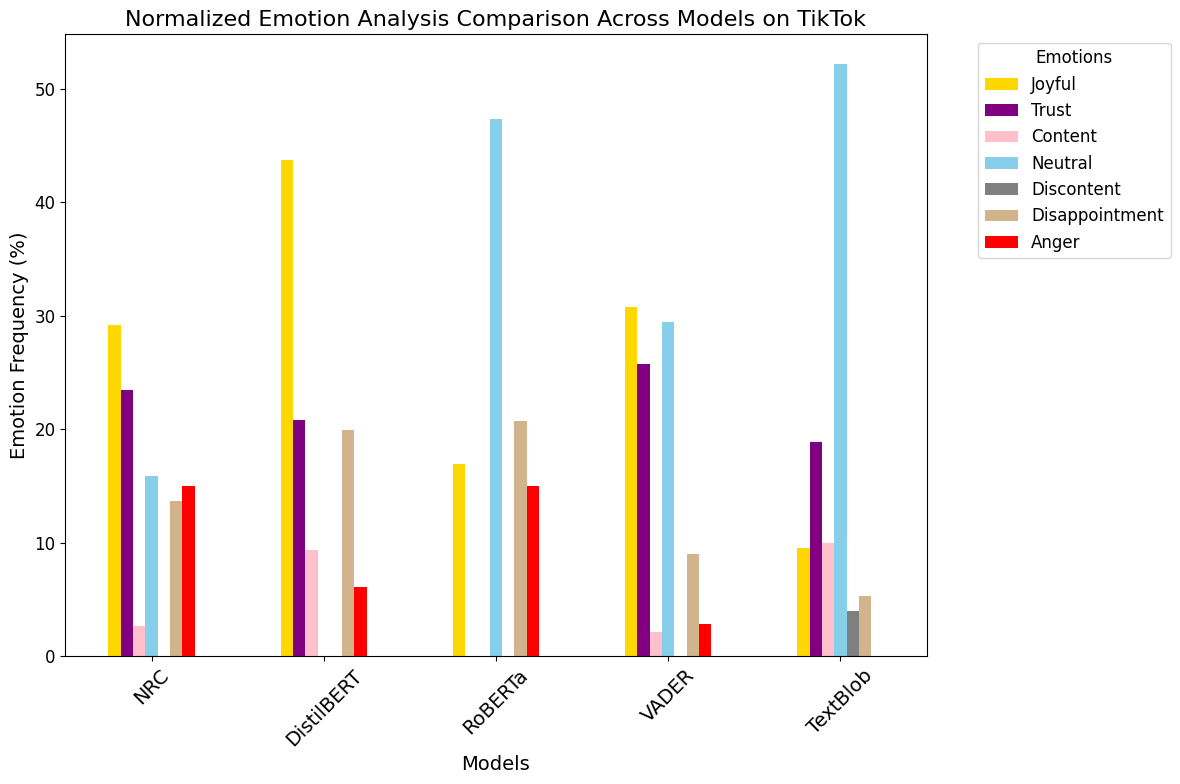

In [15]:
# Transpose the emotion counts DataFrame
emotion_summary_transposed_tiktok = emotion_counts_df_tiktok.T

# Calculate total counts for each platform (row-wise sum)
emotion_summary_transposed_tiktok['Total'] = emotion_summary_transposed_tiktok.sum(axis=1)

# Normalize by dividing each count by the total counts for each model
normalized_emotion_summary_tiktok = emotion_summary_transposed_tiktok.div(emotion_summary_transposed_tiktok['Total'], axis=0).drop(columns=['Total'])

# Convert proportions to percentages
normalized_emotion_summary_tiktok *= 100

# Create the bar chart with custom colors and emotion order
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown (hex code for "tan")
    'Anger': 'red'
}

# Define the desired order of emotions
emotion_order = ['Joyful', 'Trust', 'Content', 'Neutral', 'Discontent', 'Disappointment', 'Anger']

normalized_emotion_summary_tiktok = normalized_emotion_summary_tiktok[emotion_order]


# Visualize the normalized data
normalized_emotion_summary_tiktok.plot(kind='bar', figsize=(12, 8),  color=[custom_colors[emotion] for emotion in emotion_order])
plt.title('Normalized Emotion Analysis Comparison Across Models on TikTok', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Emotion Frequency (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.legend(title='Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [16]:
#Intagram_ Combine polarity analysis

In [17]:
# Load the dataset- a CSV file - with a 'Lemmatized_Comments' column
df_1 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\data processing\Cleaned_Instagram-comments3.csv')[['Lemmatized_Comments']]

In [18]:
# Load the dataset- a CSV file - with a 'NRC_analysis' column
df_2 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\lexicon_emotions26_ins.csv')[['NRC_analysis']]

In [19]:
# Load the dataset- a CSV file - with a 'DistilBERT_emotion_labels' column
df_3 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\Pre-trained Model Analysis26_ins.csv')[['DistilBERT_emotion_labels']]

In [20]:
# Load the dataset- a CSV file - with a 'RoBERTa_polarity' column
df_4 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\Emotion_Analysis_RoBERTa26_ins.csv')[['RoBERTa_emotion']]

In [21]:
# Load the dataset- a CSV file - with a 'VADER_polarity' column
df_5 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\VADER_Emotion_Analysis26_ins.csv')[['VADER_emotion']]

In [22]:
# Load the dataset- a CSV file - with a 'TextBlob_polarity' column
df_6 = pd.read_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\TextBlob_polarity_Emotion_Analysis_instagram26.csv')[['TextBlob_Emotion']]

In [23]:
# Combine all the DataFrames horizontally
combined_df_ins = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6], axis=1)

# Display the combined DataFrame
print(combined_df_ins.head())

# Save the combined DataFrame to a new CSV file
combined_df_ins.to_csv(r'C:\Users\paris\OneDrive\thesis\collect data\Analysis\results\Instagram\combined_emotion_analysis.csv', index=False)
print("Combined DataFrame saved as 'combined_emotion_analysis.csv'.")

                        Lemmatized_Comments                    NRC_analysis  \
0  look nourish perfect keep lips soft cool  ['Joyful', 'Neutral', 'Trust']   
1                                    pretty  ['Joyful', 'Neutral', 'Trust']   
2                               labour love                      ['Joyful']   
3                                       wow                      ['Joyful']   
4                           oh soooo pretty  ['Joyful', 'Neutral', 'Trust']   

  DistilBERT_emotion_labels                          RoBERTa_emotion  \
0       {'Joyful', 'Trust'}                    ['Joyful', 'Neutral']   
1                {'Joyful'}                              ['Neutral']   
2       {'Joyful', 'Trust'}                              ['Neutral']   
3                {'Joyful'}                               ['Joyful']   
4                {'Joyful'}  ['Disappointment', 'Joyful', 'Neutral']   

  VADER_emotion TextBlob_Emotion  
0        Joyful            Trust  
1         Trust       

In [24]:
# # Select relevant columns from the DataFrame
comparison_df = combined_df_ins[['Lemmatized_Comments', 'NRC_analysis', 'DistilBERT_emotion_labels', 'TextBlob_Emotion', 'VADER_emotion', 'RoBERTa_emotion']]

# Display the combined DataFrame for verification
print(comparison_df.head())


                        Lemmatized_Comments                    NRC_analysis  \
0  look nourish perfect keep lips soft cool  ['Joyful', 'Neutral', 'Trust']   
1                                    pretty  ['Joyful', 'Neutral', 'Trust']   
2                               labour love                      ['Joyful']   
3                                       wow                      ['Joyful']   
4                           oh soooo pretty  ['Joyful', 'Neutral', 'Trust']   

  DistilBERT_emotion_labels TextBlob_Emotion VADER_emotion  \
0       {'Joyful', 'Trust'}            Trust        Joyful   
1                {'Joyful'}            Trust         Trust   
2       {'Joyful', 'Trust'}            Trust        Joyful   
3                {'Joyful'}          Neutral        Joyful   
4                {'Joyful'}            Trust         Trust   

                           RoBERTa_emotion  
0                    ['Joyful', 'Neutral']  
1                              ['Neutral']  
2                

In [25]:
from collections import Counter
import pandas as pd

# Debugging Step: Check data types in the columns
print("Data types in NRC_analysis:", comparison_df['NRC_analysis'].apply(type).value_counts())
print("Data types in DistilBERT_emotion_labels:", comparison_df['DistilBERT_emotion_labels'].apply(type).value_counts())
print("Data types in RoBERTa_emotion:", comparison_df['RoBERTa_emotion'].apply(type).value_counts())

# Function to count emotions in list-based columns
def count_emotions_list(column_data):
    all_emotions = []
    for emotions in column_data:
        if isinstance(emotions, list):
            all_emotions.extend(emotions)
        elif isinstance(emotions, str):
            # Handle stringified lists (e.g., "['Joyful', 'Trust']")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, list):
                    all_emotions.extend(eval_emotions)
            except:
                pass  # Skip if it can't be evaluated
    return Counter(all_emotions)

# Function to count emotions in set-based columns
def count_emotions_set(column_data):
    all_emotions = []
    for emotions in column_data:
        if isinstance(emotions, set):
            all_emotions.extend(list(emotions))
        elif isinstance(emotions, str):
            # Handle stringified sets (e.g., "{'Joyful', 'Trust'}")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, set):
                    all_emotions.extend(list(eval_emotions))
            except:
                pass
    return Counter(all_emotions)

# Function to count emotions in dict-based columns
def count_emotions_dict(column_data):
    total_counts = Counter()
    for emotions in column_data:
        if isinstance(emotions, dict):
            total_counts.update(emotions)
        elif isinstance(emotions, str):
            # Handle stringified dictionaries (e.g., "{'Joyful': 1, 'Trust': 2}")
            try:
                eval_emotions = eval(emotions)
                if isinstance(eval_emotions, dict):
                    total_counts.update(eval_emotions)
            except:
                pass
    return total_counts

# Aggregating emotion counts
try:
    
    nrc_emotion_counts = count_emotions_list(comparison_df['NRC_analysis'])
    distilbert_emotion_counts = count_emotions_set(comparison_df['DistilBERT_emotion_labels'])
    roberta_emotion_counts = count_emotions_list(comparison_df['RoBERTa_emotion'])
    vader_emotion_counts = Counter(comparison_df['VADER_emotion'])
    textblob_emotion_counts = Counter(comparison_df['TextBlob_Emotion'])
except Exception as e:
    print("Error during aggregation:", e)

# Combine results into a DataFrame
emotion_counts_df_Ins = pd.DataFrame({
    
    'NRC': nrc_emotion_counts,
    'DistilBERT': distilbert_emotion_counts,
    'RoBERTa': roberta_emotion_counts,
    'VADER': vader_emotion_counts,
    'TextBlob': textblob_emotion_counts
}).fillna(0).astype(int)

# Display the aggregated emotion counts
print(emotion_counts_df_Ins)


Data types in NRC_analysis: NRC_analysis
<class 'str'>    416
Name: count, dtype: int64
Data types in DistilBERT_emotion_labels: DistilBERT_emotion_labels
<class 'str'>    416
Name: count, dtype: int64
Data types in RoBERTa_emotion: RoBERTa_emotion
<class 'str'>    416
Name: count, dtype: int64
                NRC  DistilBERT  RoBERTa  VADER  TextBlob
Joyful          311         360      211    245       101
Neutral         144           0      349     57       150
Trust           184         180        0    104       114
Disappointment   47          85      161      4         6
Anger            66          28       88      4         0
Content          20          28        0      2        42
Discontent        0           0        0      0         3


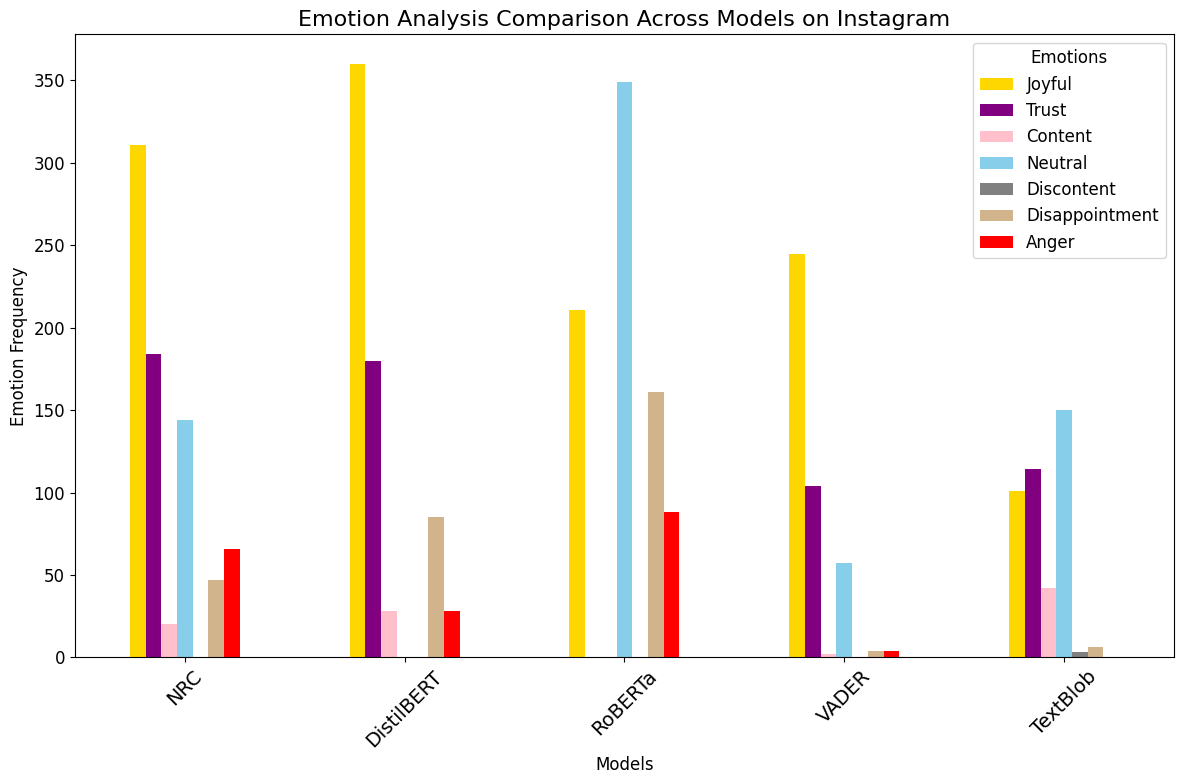

In [30]:
# Define custom colors for emotions
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown (hex code for "tan")
    'Anger': 'red'
}

# Define the desired order of emotions
emotion_order = ['Joyful', 'Trust', 'Content', 'Neutral', 'Discontent', 'Disappointment', 'Anger']

# Ensure the DataFrame follows the desired emotion order
emotion_summary_transposed_Ins = emotion_counts_df_Ins.T[emotion_order]

# Plot with custom colors
ax = emotion_summary_transposed_Ins.plot(
    kind='bar',
    figsize=(12, 8),
    color=[custom_colors[emotion] for emotion in emotion_order]
)

# Customize the chart
plt.title('Emotion Analysis Comparison Across Models on Instagram', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Emotion Frequency', fontsize=12)
plt.xticks(rotation=0, fontsize=14)
plt.legend(title='Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Emotions', loc='upper right')
plt.tight_layout()

# Display the plot
plt.show()


In [27]:
#Compare two platforms

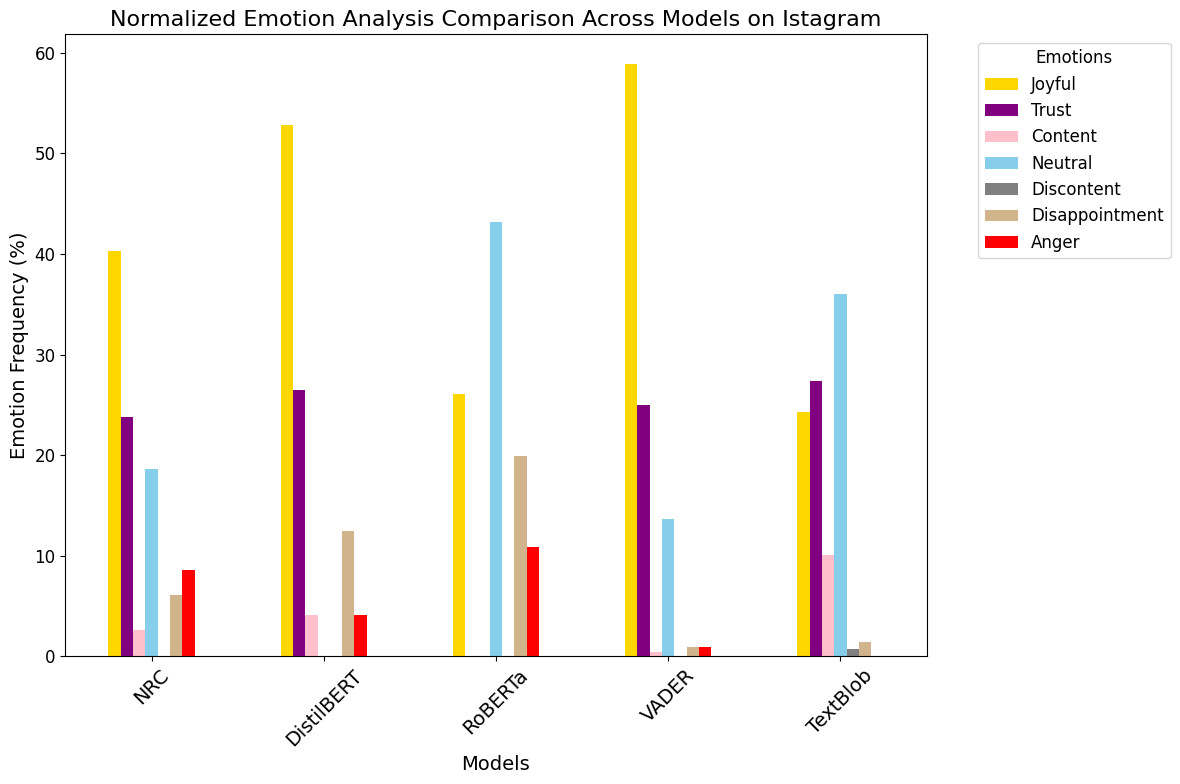

In [31]:
# Transpose the emotion counts DataFrame
emotion_summary_transposed_Ins = emotion_counts_df_Ins.T

# Calculate total counts for each platform (row-wise sum)
emotion_summary_transposed_Ins['Total'] = emotion_summary_transposed_Ins.sum(axis=1)

# Normalize by dividing each count by the total counts for each model
normalized_emotion_summary_Ins = emotion_summary_transposed_Ins.div(emotion_summary_transposed_Ins['Total'], axis=0).drop(columns=['Total'])

# Convert proportions to percentages
normalized_emotion_summary_Ins *= 100

# Create the bar chart with custom colors and emotion order
custom_colors = {
    'Joyful': 'gold',
    'Trust': 'purple',
    'Content': 'pink',
    'Neutral': 'skyblue',
    'Discontent': 'gray',
    'Disappointment': '#D2B48C',  # Light brown (hex code for "tan")
    'Anger': 'red'
}

# Define the desired order of emotions
emotion_order = ['Joyful', 'Trust', 'Content', 'Neutral', 'Discontent', 'Disappointment', 'Anger']

normalized_emotion_summary_Ins = normalized_emotion_summary_Ins[emotion_order]

# Visualize the normalized data
normalized_emotion_summary_Ins.plot(kind='bar', figsize=(12, 8), color=['gold', 'purple', 'pink', 'skyblue', 'gray', '#D2B48C', 'red'])
plt.title('Normalized Emotion Analysis Comparison Across Models on Istagram', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Emotion Frequency (%)', fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.legend(title='Model', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Emotions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()